In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/')

In [3]:
trace_a = pickle.load(open('earm_dreamz_3chain_a_psostart.p'))
trace_b = pickle.load(open('earm_dreamz_3chain_b_psostart.p'))
trace_c = pickle.load(open('earm_dreamz_3chain_c_psostart.p'))
trace_d = pickle.load(open('earm_dreamz_3chain_d_psostart.p'))

In [4]:
trace_a_error = {}
trace_b_error = {}
trace_c_error = {}
trace_d_error = {}
for key in ['momp', 'icrp', 'ecrp']:
    trace_a_error[key] = trace_a[key]
    trace_b_error[key] = trace_b[key]
    trace_c_error[key] = trace_c[key]
    trace_d_error[key] = trace_d[key]

In [5]:
for key in ['momp', 'icrp', 'ecrp']:
    del trace_a[key]
    del trace_b[key]
    del trace_c[key]
    del trace_d[key]

In [6]:
param_trace_a = convert_param_vec_dict_to_param_dict(trace_a, model.parameters_rules())
param_trace_b = convert_param_vec_dict_to_param_dict(trace_b, model.parameters_rules())
param_trace_c = convert_param_vec_dict_to_param_dict(trace_c, model.parameters_rules())
param_trace_d = convert_param_vec_dict_to_param_dict(trace_d, model.parameters_rules())

In [7]:
os.chdir('/home/shockle/moo_and_mcmc/emcee/')

In [8]:
from earm_uniform_emcee import log_post

In [9]:
for trace in [trace_a, trace_b, trace_c, trace_d]:
    for chain in range(len(trace_a['params'])):
        log_post(trace['params'][chain][-1])

prior:  -282.479411206  like:  -1076.06099608  post:  -1358.54040728
prior:  -282.479411206  like:  -1075.11293974  post:  -1357.59235094
prior:  -282.479411206  like:  -1080.28199008  post:  -1362.76140129
prior:  -282.479411206  like:  -1087.73484831  post:  -1370.21425951
prior:  -282.479411206  like:  -989.940634078  post:  -1272.42004528
prior:  -282.479411206  like:  -1012.36733775  post:  -1294.84674896
prior:  -282.479411206  like:  -1130.35350918  post:  -1412.83292039
prior:  -282.479411206  like:  -1136.94900165  post:  -1419.42841285
prior:  -282.479411206  like:  -1135.74390221  post:  -1418.22331341
prior:  -282.479411206  like:  -929.942285295  post:  -1212.4216965
prior:  -282.479411206  like:  -915.700801182  post:  -1198.18021239
prior:  -282.479411206  like:  -910.812005637  post:  -1193.29141684


In [10]:
print_convergence_summary(param_trace_a)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [11]:
print_convergence_summary(param_trace_b)

Number of parameters with GR below 1.2:  61  of  105  parameters.
Percent of parameters with GR below 1.2:  58.0952380952
Number of parameters with GR below 1.1:  33  of  105  parameters.
Percent of parameters with GR below 1.1:  31.4285714286


[61, 58.0952380952381, 33, 31.428571428571427]

In [12]:
print_convergence_summary(param_trace_c)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  104  of  105  parameters.
Percent of parameters with GR below 1.1:  99.0476190476


[105, 100.0, 104, 99.04761904761905]

In [13]:
print_convergence_summary(param_trace_d)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  103  of  105  parameters.
Percent of parameters with GR below 1.1:  98.0952380952


[105, 100.0, 103, 98.09523809523809]

60000
3
60000


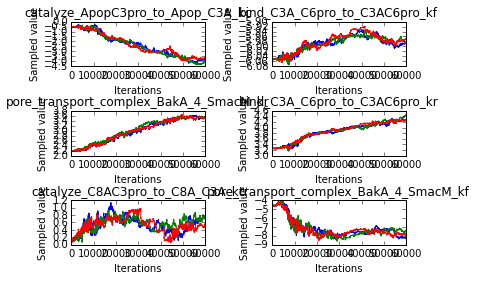

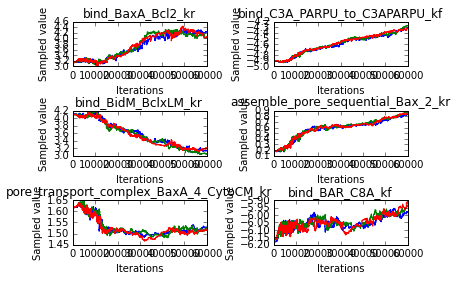

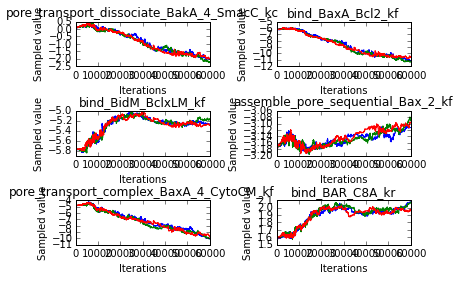

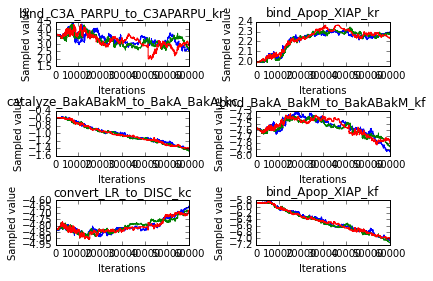

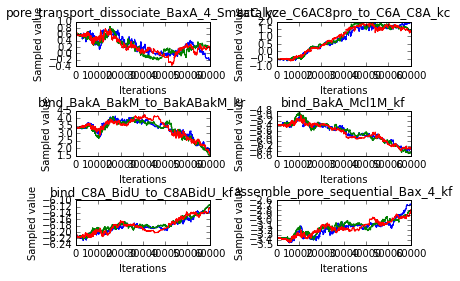

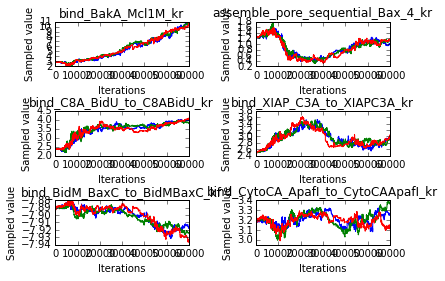

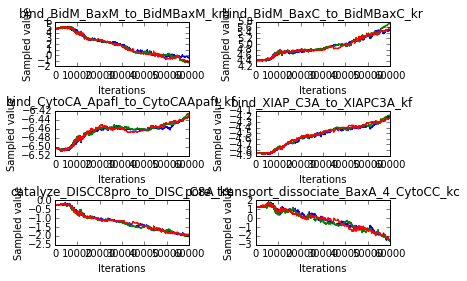

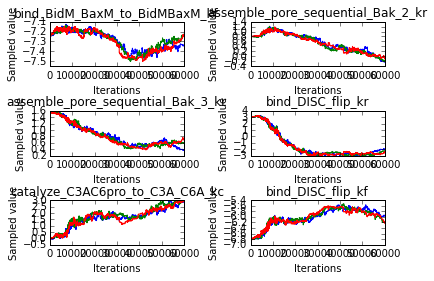

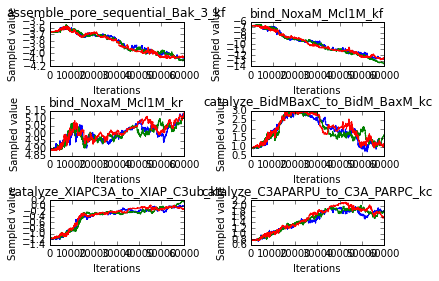

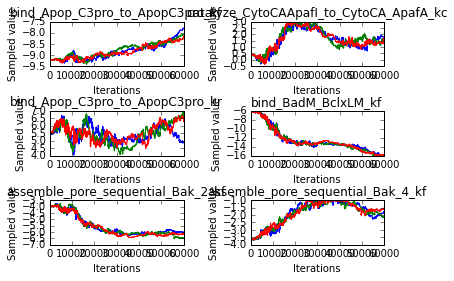

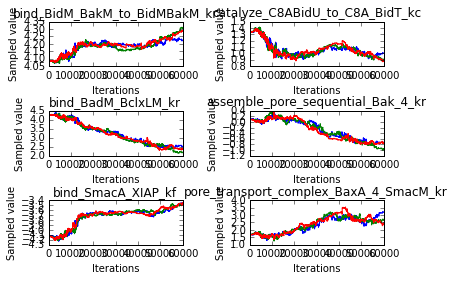

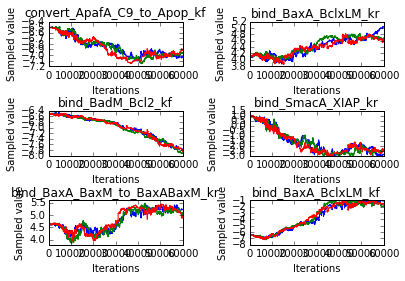

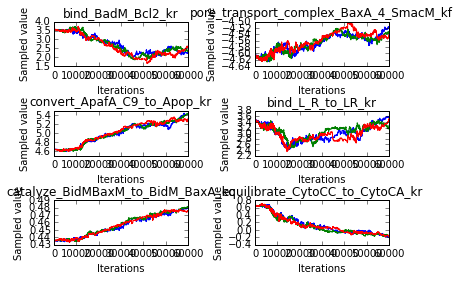

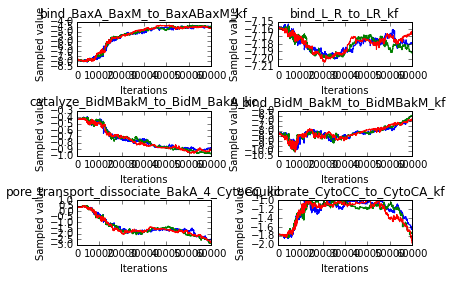

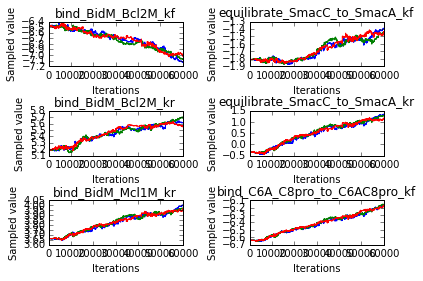

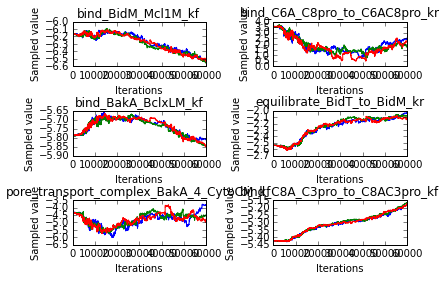

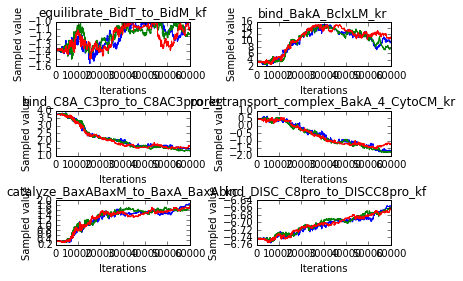

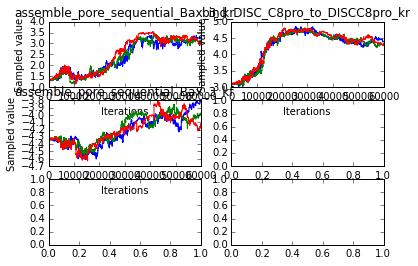

In [14]:
sample_plots(param_trace_a)

In [15]:
trace_arr_a = create_trace_matrix(param_trace_a, burnin=50000)
trace_arr_b = create_trace_matrix(param_trace_b, burnin=50000)
trace_arr_c = create_trace_matrix(param_trace_c, burnin=50000)
trace_arr_d = create_trace_matrix(param_trace_d, burnin=50000)

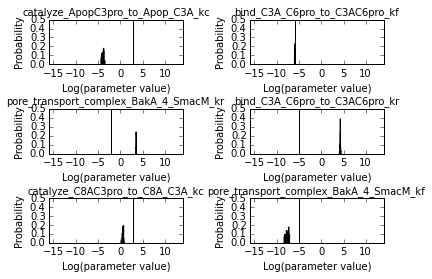

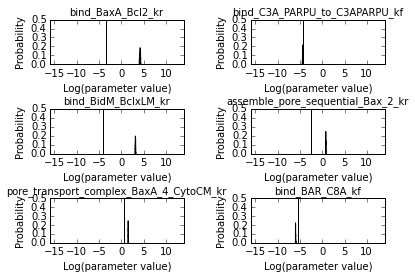

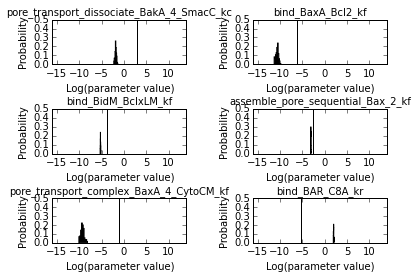

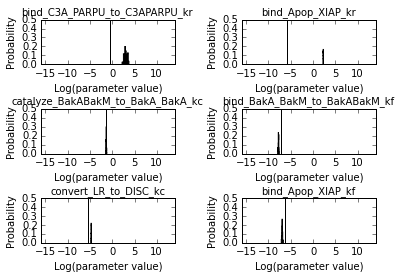

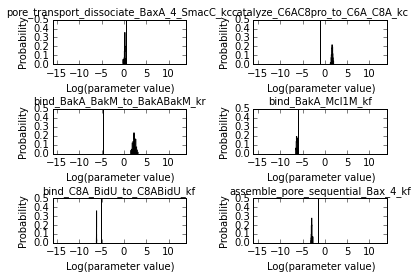

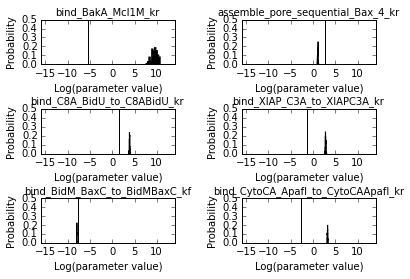

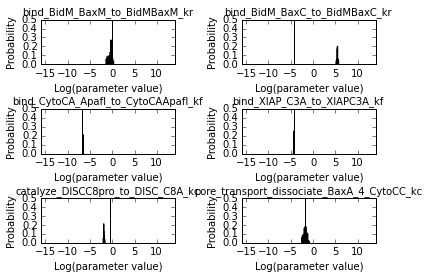

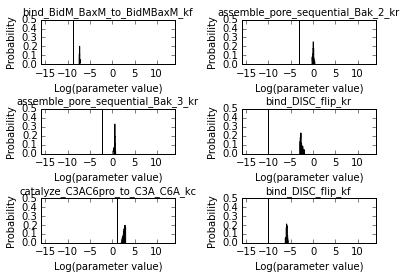

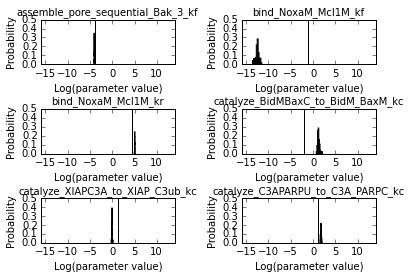

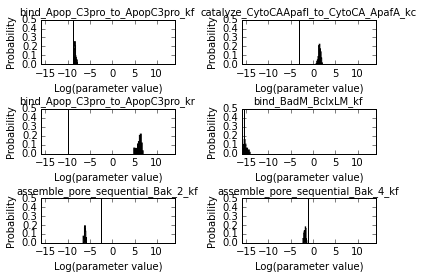

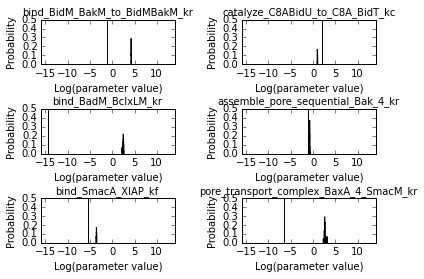

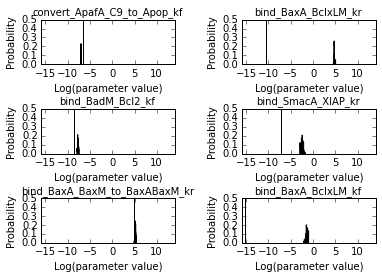

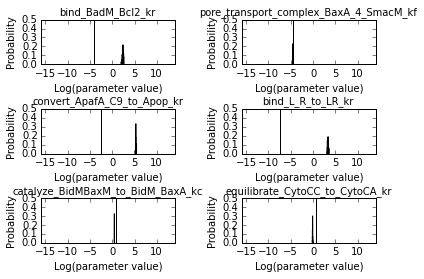

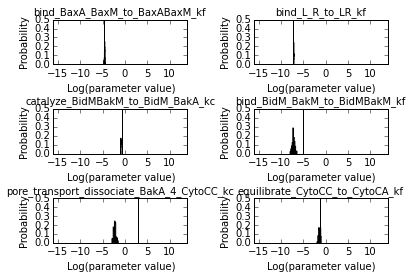

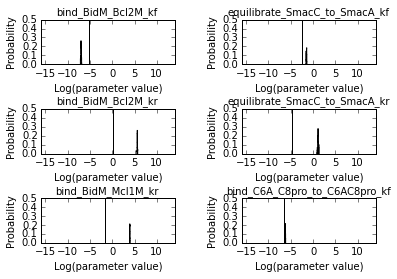

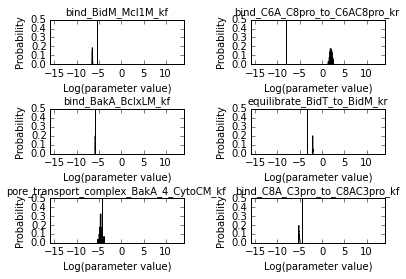

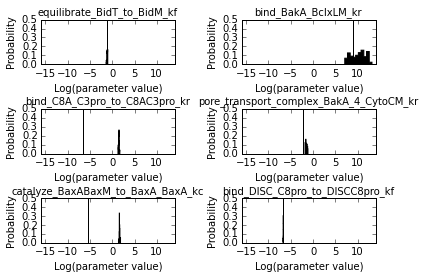

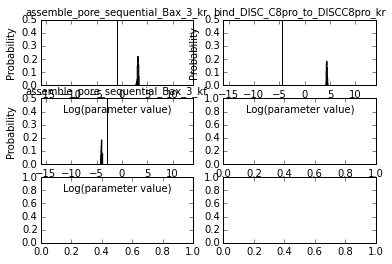

In [16]:
plot_histograms(param_trace_a, trace_arr_a, plot_original_vals=True, model=model, title_fontsize=10)